### LOAD MERGED CSV

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('merged.csv')

In [3]:
df.head()

City State      lat       lon  TotalPop     Men   Women  Hispanic  \
0        Akron    OH  41.0798  -81.5219    267782  129623  138086       1.9   
1       Albany    GA  31.5776  -84.1762     93421   43571   49835       2.8   
2       Albany    NY  42.6664  -73.7987    147794   70664   77096       7.8   
3       Albany    OR  44.6274 -123.0966     61555   30378   31168      11.4   
4  Albuquerque    NM  35.1053 -106.6464    632240  309415  322758      50.4   

   White  Black  Native  Asian  Pacific   Income  IncomeErr  IncomePerCap  \
0   67.4   23.2     0.2    3.6      0.0  3068406     504125       1732548   
1   29.2   65.2     0.1    0.9      0.0  1025141     199233        547674   
2   60.3   20.1     0.1    7.6      0.0  1917135     331452       1102265   
3   82.7    0.6     0.7    1.9      0.1   542299      75753        268177   
4   38.5    2.5     4.0    2.4      0.1  7693803    1270581       4099669   

   IncomePerCapErr  Poverty  ChildPoverty  Employed  Unemployment  \
0           258991     19.6          26.2    126247           8.5   
1            89500     29.6          41.9     35704          16.2   
2           158632     17.4          17.8     74293           6.6   
3            35254     14.3          18.6     27721           8.2   
4           581026     18.2          24.8    292907           6.8   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Professional  Service  \
0         85.4        10.3           4.1         0.1          32.3     19.8   
1         71.9        23.7           4.1         0.1          30.7     21.4   
2         71.6        24.3           3.9         0.0          42.9     20.5   
3         78.5        15.9           5.4         0.1          33.3     18.4   
4         74.5        19.6           5.6         0.2          39.8     20.0   

   Office  Construction  Production  Drive  Carpool  Transit  Walk  \
0    25.3           6.6        15.6   83.3      8.5      3.1   1.6   
1    23.1           8.1        16.3   78.1     12.4      1.8   2.3   
2    25.2           4.6         6.6   70.4      7.2     10.1   7.3   
3    22.7           9.9        15.5   79.0     10.7      0.3   2.6   
4    24.0           8.3         7.7   80.2      9.1      1.8   1.8   

   OtherTransp  WorkAtHome  MeanCommute  Rent  Year  Population  \
0          0.6         2.7         21.9   911  2020      197882   
1          0.7         4.3         19.1   814  2020       74989   
2          1.7         2.9         18.9  1205  2020       97221   
3          2.0         5.1         20.8  1197  2020       54993   
4          2.5         4.3         21.7  1013  2020      561920   

   Violent crime  Murder and nonnegligent manslaughter  Rape  Robbery  \
0           1782                                    27   181      328   
1            790                                    12    32      165   
2            736                                     4    60      189   
3             70                                     1    10       16   
4           7596                                    84   486     1699   

   Aggravated assault  Property crime  Burglary  Larceny- theft  \
0                1246            6568      1686            4305   
1                 581            3452       729            2489   
2                 483            2919       445            2315   
3                  43            1467       128            1242   
4                5327           26059         0           20634   

   Motor vehicle theft  Arson  Crime Rate per 1000 Crime Rating  \
0                  577     65                42.20         High   
1                  234     17                56.57         High   
2                  159     16                37.59       Medium   
3                   97     17                27.95       Medium   
4                 5425     98                59.89         High   

   Days with AQI  Good Days  Moderate Days  \
0            274        203             68   
1            244     

### Simpson's Diversity Index

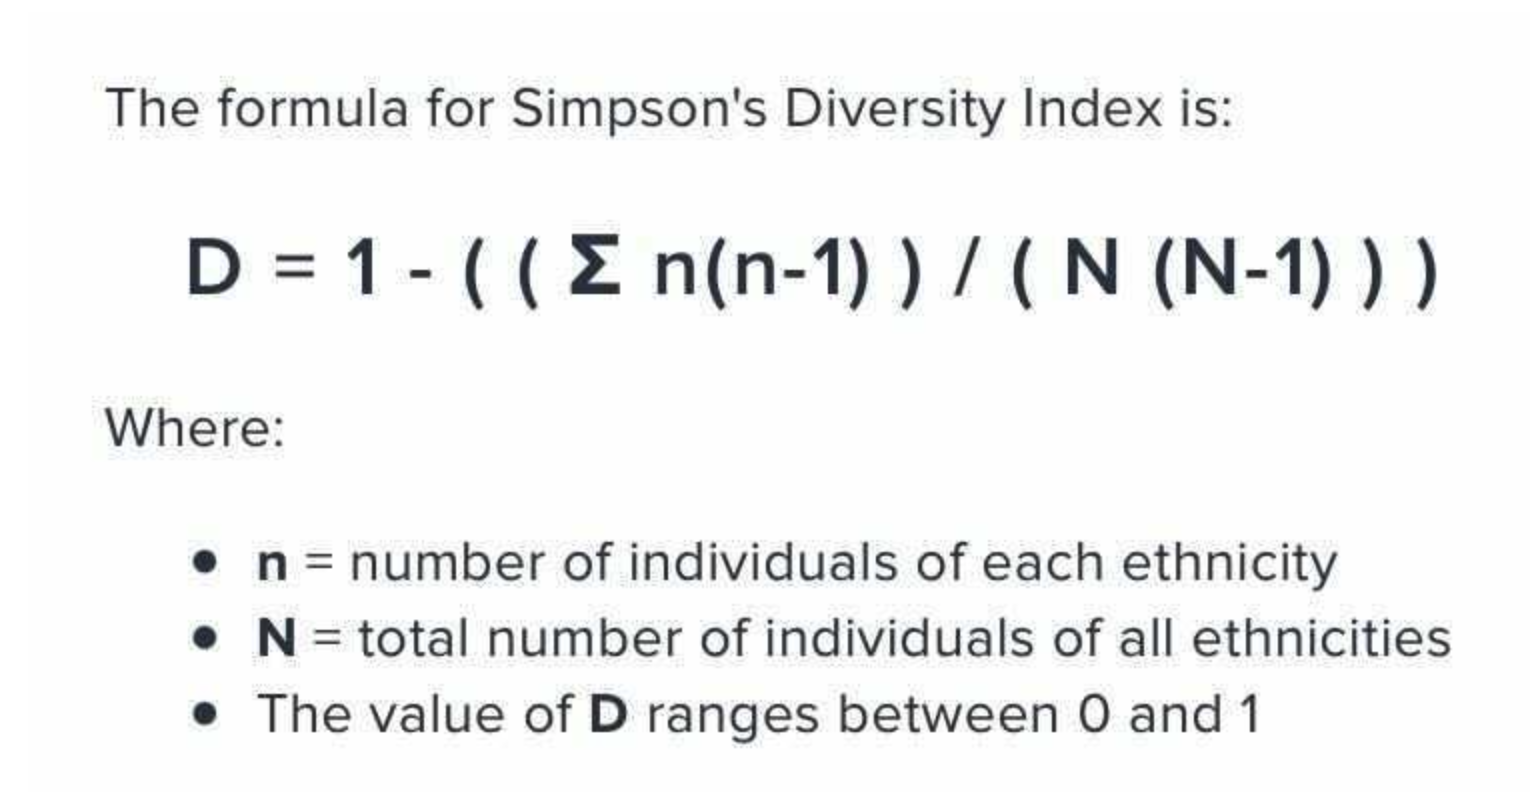

In [4]:
diversity = df[['City', 'State','TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]

In [5]:
diversity.dtypes

City         object
State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object

In [6]:
cols = list(set(list(diversity.columns)) - set(['City', 'State', 'TotalPop']))

In [7]:
diversity['Diversity Index'] = 1
for col in cols:
  diversity[col] = diversity[col]/100
  diversity[col]= diversity[col].multiply(diversity['TotalPop'], axis='index')
  diversity['Diversity Index'] -= ((diversity[col]*(diversity[col]-1))/(diversity['TotalPop']*(diversity['TotalPop']-1)))

In [8]:
print(diversity.shape)
diversity.head()

(397, 10)


City State  TotalPop    Hispanic       White      Black     Native  \
0        Akron    OH    267782    5087.858  180485.068  62125.424    535.564   
1       Albany    GA     93421    2615.788   27278.932  60910.492     93.421   
2       Albany    NY    147794   11527.932   89119.782  29706.594    147.794   
3       Albany    OR     61555    7017.270   50905.985    369.330    430.885   
4  Albuquerque    NM    632240  318648.960  243412.400  15806.000  25289.600   

       Asian  Pacific  Diversity Index  
0   9640.152    0.000         0.490241  
1    840.789    0.000         0.488771  
2  11232.344    0.000         0.584133  
3   1169.545   61.555         0.302632  
4  15173.760  632.240         0.594958

### Check

In [9]:
a = 223042*0.08 
b = 223042*0.556 
c = 223042*0.054 
d = 223042*0.08 
e = 223042*0.096 
f = 223042*0.028
t = 223042

In [10]:
1 - (((a*(a-1)) + (b*(b-1)) + (c*(c-1)) + (d*(d-1)) + (e*(e-1)) + (f*(f-1)))/(t*(t-1)))

0.6651505069292192

### Add Diversity Index to DB

In [11]:
df['Diversity Index'] = diversity['Diversity Index']

In [12]:
df.head()

City State      lat       lon  TotalPop     Men   Women  Hispanic  \
0        Akron    OH  41.0798  -81.5219    267782  129623  138086       1.9   
1       Albany    GA  31.5776  -84.1762     93421   43571   49835       2.8   
2       Albany    NY  42.6664  -73.7987    147794   70664   77096       7.8   
3       Albany    OR  44.6274 -123.0966     61555   30378   31168      11.4   
4  Albuquerque    NM  35.1053 -106.6464    632240  309415  322758      50.4   

   White  Black  Native  Asian  Pacific   Income  IncomeErr  IncomePerCap  \
0   67.4   23.2     0.2    3.6      0.0  3068406     504125       1732548   
1   29.2   65.2     0.1    0.9      0.0  1025141     199233        547674   
2   60.3   20.1     0.1    7.6      0.0  1917135     331452       1102265   
3   82.7    0.6     0.7    1.9      0.1   542299      75753        268177   
4   38.5    2.5     4.0    2.4      0.1  7693803    1270581       4099669   

   IncomePerCapErr  Poverty  ChildPoverty  Employed  Unemployment  \
0           258991     19.6          26.2    126247           8.5   
1            89500     29.6          41.9     35704          16.2   
2           158632     17.4          17.8     74293           6.6   
3            35254     14.3          18.6     27721           8.2   
4           581026     18.2          24.8    292907           6.8   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Professional  Service  \
0         85.4        10.3           4.1         0.1          32.3     19.8   
1         71.9        23.7           4.1         0.1          30.7     21.4   
2         71.6        24.3           3.9         0.0          42.9     20.5   
3         78.5        15.9           5.4         0.1          33.3     18.4   
4         74.5        19.6           5.6         0.2          39.8     20.0   

   Office  Construction  Production  Drive  Carpool  Transit  Walk  \
0    25.3           6.6        15.6   83.3      8.5      3.1   1.6   
1    23.1           8.1        16.3   78.1     12.4      1.8   2.3   
2    25.2           4.6         6.6   70.4      7.2     10.1   7.3   
3    22.7           9.9        15.5   79.0     10.7      0.3   2.6   
4    24.0           8.3         7.7   80.2      9.1      1.8   1.8   

   OtherTransp  WorkAtHome  MeanCommute  Rent  Year  Population  \
0          0.6         2.7         21.9   911  2020      197882   
1          0.7         4.3         19.1   814  2020       74989   
2          1.7         2.9         18.9  1205  2020       97221   
3          2.0         5.1         20.8  1197  2020       54993   
4          2.5         4.3         21.7  1013  2020      561920   

   Violent crime  Murder and nonnegligent manslaughter  Rape  Robbery  \
0           1782                                    27   181      328   
1            790                                    12    32      165   
2            736                                     4    60      189   
3             70                                     1    10       16   
4           7596                                    84   486     1699   

   Aggravated assault  Property crime  Burglary  Larceny- theft  \
0                1246            6568      1686            4305   
1                 581            3452       729            2489   
2                 483            2919       445            2315   
3                  43            1467       128            1242   
4                5327           26059         0           20634   

   Motor vehicle theft  Arson  Crime Rate per 1000 Crime Rating  \
0                  577     65                42.20         High   
1                  234     17                56.57         High   
2                  159     16                37.59       Medium   
3                   97     17                27.95       Medium   
4                 5425     98                59.89         High   

   Days with AQI  Good Days  Moderate Days  \
0            274        203             68   
1            244     

In [13]:
df.to_csv('diversity.csv', index = False)